<a href="https://colab.research.google.com/github/JGranda11/Proyecto-ai4eng20241/blob/main/04%20-%20modelos_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iteraciones Modelos de aprendizaje Supervisados
En este notebook vamos a realizar los primeros acercamientos a realizar entrenamiento de modelos de datos ya preprocesados de la manera en que se hizo en el Notebook 02.

Se realiza la instalacion de ciertas librerias ya que se trabaja en un entorno de Jupyter y no en colab

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 277.5 MB/s eta 0:00:00a 0:00:01


In [ ]:
#bibliotecas de machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit, KFold, cross_val_score

# Libreria para transformar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seaborn: Libreria para la visualización de datos
import seaborn as sns

## Carga de datos
Lo que se hizo fue generar un archivo .csv en el Notebook anterior para realizar el preprocesamiento a los datos, y cargar los datos ya procesados en un Notebook distinto

In [ ]:
train = pd.read_csv('trainP1.csv')

In [ ]:
test = pd.read_csv('testP1.csv')

In [ ]:
test.shape

(296786, 57)

In [ ]:
train.shape

(692500, 57)

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,...,"('PSICOLOGIA',)","('PUBLICIDAD',)","('QUIMICA',)","('RELACIONES',)","('VETERINARIA',)","('AMAZONA',)","('ANDINA',)","('CARIBE',)","('ORINOQUIA',)","('PACIFICA',)"
0,6.0,1.0,3.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.0,0.0,3.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,4.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
pd.options.display.max_columns = 0
train

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,"('2018',)","('2019',)","('2020',)","('2021',)","('ADMINISTRACION',)","('AGRONOMIA',)","('ARTES',)","('CIENCIAS',)","('CINE',)","('COMERCIO',)","('COMUNICACION',)","('CONSTRUCCION',)","('CONTADURIA',)","('DIRECCION',)","('DISEÑO',)","('ECONOMIA',)","('ESTUDIOS',)","('FILOLOGIA',)","('FILOSOFIA',)","('FINANZAS',)","('GEOGRAFIA',)","('GERENCIA',)","('GESTION',)","('HISTORIA',)","('HOTELERIA',)","('INGENIERIA',)","('LENGUAS',)","('LICENCIATURA',)","('LITERATURA',)","('MATEMATICAS',)","('MERCADEO',)","('MUSICA',)","('NEGOCIOS',)","('Otras',)","('PROFESIONAL',)","('PSICOLOGIA',)","('PUBLICIDAD',)","('QUIMICA',)","('RELACIONES',)","('VETERINARIA',)","('AMAZONA',)","('ANDINA',)","('CARIBE',)","('ORINOQUIA',)","('PACIFICA',)"
0,6.0,1.0,3.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.0,0.0,3.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,4.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,2.0,2.0,2.0,1.0,4.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
692496,4.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,3.0,1.0,3.0,1.0,4.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
train.columns

Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', '('2018',)', '('2019',)',
       '('2020',)', '('2021',)', '('ADMINISTRACION',)', '('AGRONOMIA',)',
       '('ARTES',)', '('CIENCIAS',)', '('CINE',)', '('COMERCIO',)',
       '('COMUNICACION',)', '('CONSTRUCCION',)', '('CONTADURIA',)',
       '('DIRECCION',)', '('DISEÑO',)', '('ECONOMIA',)', '('ESTUDIOS',)',
       '('FILOLOGIA',)', '('FILOSOFIA',)', '('FINANZAS',)', '('GEOGRAFIA',)',
       '('GERENCIA',)', '('GESTION',)', '('HISTORIA',)', '('HOTELERIA',)',
       '('INGENIERIA',)', '('LENGUAS',)', '('LICENCIATURA',)',
       '('LITERATURA',)', '('MATEMATICAS',)', '('MERCADEO',)', '('MUSICA',)',
       '('NEGOCIOS',)', '('Otras',)', '('PROFESIONAL',)', '('PSI

In [ ]:
test.columns

Index(['ID', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', '('2018',)', '('2019',)', '('2020',)',
       '('2021',)', '('ADMINISTRACION',)', '('AGRONOMIA',)', '('ARTES',)',
       '('CIENCIAS',)', '('CINE',)', '('COMERCIO',)', '('COMUNICACION',)',
       '('CONSTRUCCION',)', '('CONTADURIA',)', '('DIRECCION',)', '('DISEÑO',)',
       '('ECONOMIA',)', '('ESTUDIOS',)', '('FILOLOGIA',)', '('FILOSOFIA',)',
       '('FINANZAS',)', '('GEOGRAFIA',)', '('GERENCIA',)', '('GESTION',)',
       '('HISTORIA',)', '('HOTELERIA',)', '('INGENIERIA',)', '('LENGUAS',)',
       '('LICENCIATURA',)', '('LITERATURA',)', '('MATEMATICAS',)',
       '('MERCADEO',)', '('MUSICA',)', '('NEGOCIOS',)', '('Otras',)',
       '('PROFESIONAL',)', '('PSICOLOGIA',)', '('

In [ ]:
np.unique(train['RENDIMIENTO_GLOBAL'].values)

array([0., 1., 2., 3.])

## Definicion de los datos
Ya para este casio, tomamos del CSV, los datos que vamos a utilizar para entrenar `X` junto con un vector de salidas de referencias `y`

In [ ]:
X = train.drop(['RENDIMIENTO_GLOBAL'],axis=1)

In [ ]:
Xtest = test.drop(['ID'], axis=1)

In [ ]:
y = train['RENDIMIENTO_GLOBAL'].values

In [ ]:
np.unique(X)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
np.unique(y)

array([0., 1., 2., 3.])

## Particionar los datos

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(692500, 56) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 56) (207750, 56)


In [ ]:
estimator1 = DecisionTreeClassifier(max_depth=10)
z1 = cross_validate(estimator1, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.3))

In [ ]:
z1

{'fit_time': array([1.99403381, 2.0438633 , 1.97620034, 1.94225907, 1.93137217,
        1.98708296, 1.90608406, 1.99222636, 1.94543839, 1.95033884]),
 'score_time': array([0.05288625, 0.04970598, 0.04319406, 0.04103231, 0.04275703,
        0.04374456, 0.04209161, 0.04319119, 0.04120016, 0.04137969]),
 'estimator': [DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10)],
 'test_score': array([0.3971738 , 0.39654805, 0.3950765 , 0.39592917, 0.39417569,
        0.39651367, 0.39576414, 0.3956885 , 0.39424446, 0.39656868]),
 'train_score': array([0.40770648, 0.40633316, 0.40775658, 0.40650998, 0.40860237,
        0.40642452, 0.40482134, 0.40711412, 0.407

In [ ]:
estimator2 = RandomForestClassifier(max_depth=12)
z2 = cross_validate(estimator2, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [ ]:
z2

{'fit_time': array([25.54179716, 25.52658725, 24.29139256, 26.30467224, 25.62735629]),
 'score_time': array([2.6926496 , 2.69760108, 2.64484191, 2.68997025, 2.68700814]),
 'estimator': [RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12)],
 'test_score': array([0.40712395, 0.40584494, 0.40748152, 0.40647757, 0.40992952]),
 'train_score': array([0.44702277, 0.44600604, 0.4470876 , 0.44433213, 0.44548147])}

In [ ]:
from sklearn.naive_bayes import GaussianNB
estimator3 = GaussianNB()
z3 = cross_validate(estimator3, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.3))

In [ ]:
z3

{'fit_time': array([0.78045988, 0.75029039, 0.92360377, 1.01354671, 0.70266819,
        0.71516514, 0.69673157, 0.69873691, 0.71358776, 0.69908357]),
 'score_time': array([0.25837421, 0.31102061, 0.30746293, 0.3275578 , 0.25279617,
        0.25747418, 0.2518878 , 0.25990248, 0.25141692, 0.26370883]),
 'estimator': [GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB()],
 'test_score': array([0.28975761, 0.28853361, 0.28887055, 0.29054839, 0.28898057,
        0.28898057, 0.30520887, 0.28378202, 0.28893932, 0.287399  ]),
 'train_score': array([0.28948353, 0.28895896, 0.28890002, 0.28691962, 0.28998748,
        0.2875827 , 0.30668533, 0.28402859, 0.28802476, 0.28821631])}

In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))



In [ ]:
print('Estimador 1')
report_cv_score(z1)

print('Estimador 2')
report_cv_score(z2)

#print('Estimador 3')
#report_cv_score(z3)



Estimador 1
test score   0.396 (±0.0010) with 10 splits
train score  0.407 (±0.0010) with 10 splits
Estimador 2
test score   0.407 (±0.0014) with 5 splits
train score  0.446 (±0.0010) with 5 splits


In [ ]:
estimator2.fit(Xtr, ytr)
estimator2.score(Xtr, ytr), estimator2.score(Xts, yts)

(0.5031459515214027, 0.40882791817087843)

## Eleccion Modelo
Se decide elegir el estimator 2 `RandomForestClassifier` dado que es el modelo que mejor comportamineto tiene en test, y queremos entonces enfocarnos en mejorar este modelo

Transformamos los datos intentaod ver si se logra modificar el score, con un nuevo entrenamiento del RandomForest

In [ ]:
# Libreria para transformar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_transformed = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)

/tmp/ipykernel_66/2059910671.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['FAMI_ESTRATOVIVIENDA'], ax=ax[0])
/tmp/ipykernel_66/2059910671.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[:, 0], ax=ax[1])
/tmp/ipykernel_66/2059910671.py:13: UserWarning: 

`distplot` is 

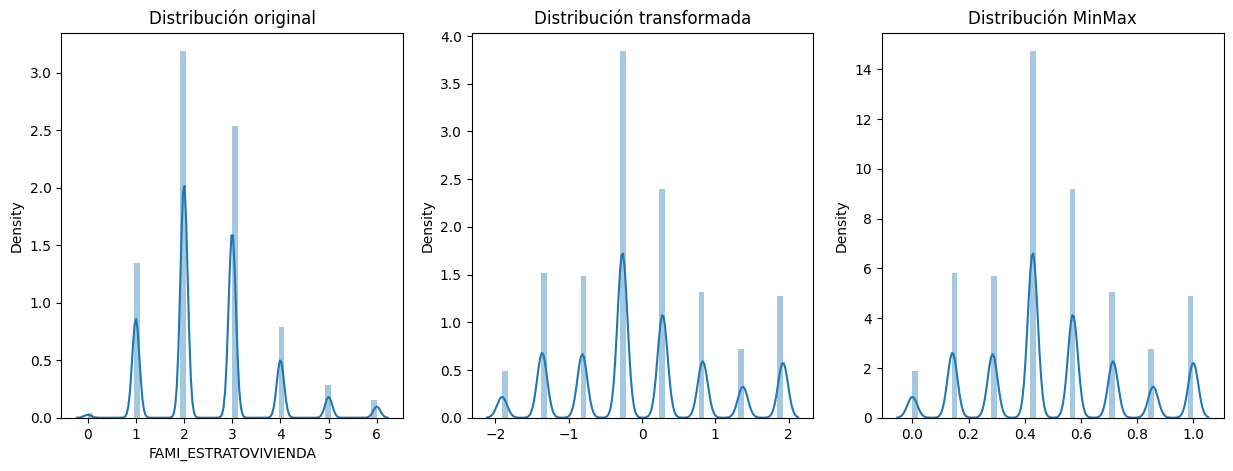

In [ ]:
import seaborn as sns

# Graficos interactivos
# Plotly: Libreria para la visualización de datos interactivos
import plotly.express as px
import plotly.subplots as sp

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(X['FAMI_ESTRATOVIVIENDA'], ax=ax[0])
ax[0].set_title('Distribución original')
sns.distplot(X_transformed[:, 0], ax=ax[1])
ax[1].set_title('Distribución transformada')
sns.distplot(X_minmax[:, 0], ax=ax[2])
ax[2].set_title('Distribución MinMax')
plt.show()

# Procesamiento con StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X_transformed.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_transformed, y, test_size=test_size)
print (X_train1.shape, X_test1.shape)

(692500, 56) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 56) (207750, 56)


In [ ]:
estimator2TR = RandomForestClassifier(max_depth=12)
z2TR = cross_validate(estimator2TR, X_train1, y_train1, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [ ]:
z2TR

{'fit_time': array([29.92505503, 23.48078227, 23.38427997, 23.22620559, 24.22741175]),
 'score_time': array([2.0818131 , 2.1217885 , 2.1213243 , 2.13028383, 2.15210605]),
 'estimator': [RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12)],
 'test_score': array([0.40551487, 0.40627815, 0.40578993, 0.40618876, 0.4067595 ]),
 'train_score': array([0.44483607, 0.44613276, 0.44574081, 0.44464157, 0.44639505])}

# Procesamiento con MinMaxScaler()





In [ ]:
print('Estimador 2')
report_cv_score(z2TR)

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X_minmax.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_minmax, y, test_size=test_size)
print (X_train2.shape, X_test2.shape)

(692500, 56) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 56) (207750, 56)


In [ ]:
estimator2MX = RandomForestClassifier(max_depth = 12)
z2MX = cross_validate(estimator2MX, X_train2, y_train2, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [ ]:
z2MX

{'fit_time': array([23.69416642, 23.76131749, 23.8011682 , 24.56363773, 23.60084963]),
 'score_time': array([2.13602972, 2.1210444 , 2.1461544 , 2.1236732 , 2.14932084]),
 'estimator': [RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12),
  RandomForestClassifier(max_depth=12)],
 'test_score': array([0.40679388, 0.40604435, 0.40745401, 0.40814853, 0.40785972]),
 'train_score': array([0.44495395, 0.4446062 , 0.44497458, 0.44492448, 0.44625949])}

In [ ]:
print('Estimador 1')
report_cv_score(z2MX)

### Analisis transformación
Vemos con la transformacion de los datos no obtenemos una diferencia de score significativa, y entonces procedemos a tratar de optimizar los parametros

### Optimización de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Estimadores
n_estimators = [int(x_minmax) for x_minmax in np.linspace(start = 10, stop = 100, num = 10)]
# Profundidad
max_depth = [int(x_minmax) for x_minmax in np.linspace(1, 20, num = 10)]
max_depth.append(None)

max_features = ['log2', 'sqrt']

criterion = ['gini', 'entropy']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]
# Crear la cuadricula aleatoria
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
forest =RandomForestClassifier()
# Busqueda aleatoria de parametros, usando 3 cv
# Busca en 10 combinaciones diferentes, y usa todos los nucleos disponibles
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Ajustar el modelo
rf_random.fit(Xtr, y)
# Mostrar los mejores parametros
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 17,
 'criterion': 'entropy'}

### Instancia del modelo con los parametros optimizados
Usamos un randomForest, con los parametros que arrojo la optimización

In [ ]:
forestDef = RandomForestClassifier(n_estimators=80, max_depth=17, min_samples_split=10, min_samples_leaf=4, criterion='entropy')
zDef = cross_validate(forestDef, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [ ]:
zDef

{'fit_time': array([24.83860135, 25.33997607, 25.31276011, 25.42334294, 25.45860529]),
 'score_time': array([2.89263368, 2.88977671, 2.89451838, 2.88736582, 2.88923979]),
 'estimator': [RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80),
  RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80),
  RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80),
  RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80),
  RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80)],
 'test_score': array([0.41069967, 0.40785972, 0.40818979, 0.4088568 , 0.41069967]),
 'trai

In [ ]:
forestDef.fit(Xtr, ytr)
forestDef.score(Xtr, ytr), forestDef.score(Xts, yts)

(0.48959257349149043, 0.40971841155234656)

In [ ]:
from sklearn.model_selection import learning_curve

# Funcion para graficar la curva de aprendizaje

def plot_learning_curve(forestDef, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    # Generar la grafica
    plt.figure(figsize=(10, 5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Score")

    # Generar los valores de la curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        forestDef, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Calcular la media y la desviacion estandar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar los resultados
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación cruzada")

    plt.legend(loc="best")
    return plt

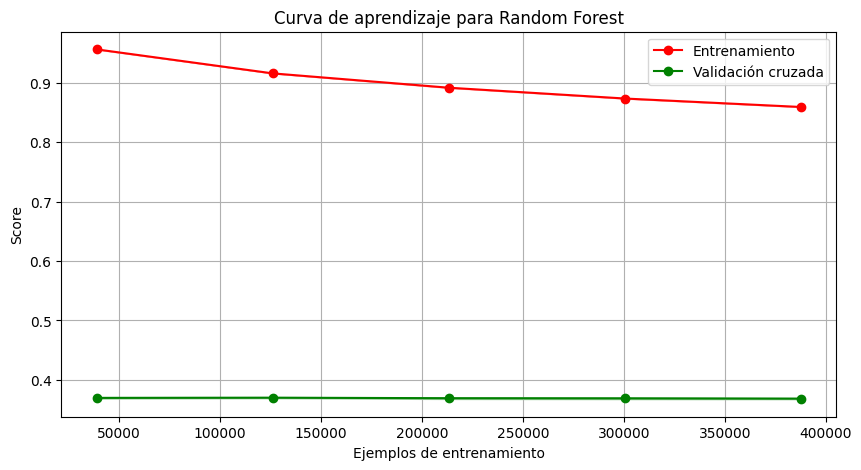

In [ ]:

plot_learning_curve(forest, 'Curva de aprendizaje para Random Forest', Xtr, ytr, cv=5)
plt.show()

Podemos ver que el modelo esta sobreajustado, ya que el score de entrenamiento es muy alto y el de validacion es muy bajo. Las soluciones a este problema son: conseguir mas datos, reducir la complejidad del modelo o aumentar la regularizacion. Sin embargo, no logramos reducir dicha precision

Por ultimo realizamos las predicciones para enviar la submisión, sabiendo que con las transformaciones y las validaciones de
la optimización no se aumento un buen Score

In [ ]:
preds = forestDef.predict(Xtest)

In [ ]:
preds

array([2., 3., 0., ..., 0., 0., 0.])

In [ ]:
idTest = pd.DataFrame(test["ID"])

Reference = ['medio-alto', 'bajo', 'alto', 'medio-bajo']
y_preditionReference = [Reference[int(i)] for i in preds]

idTest['RENDIMIENTO_GLOBAL'] = pd.Series(y_preditionReference, name='RENDIMIENTO_GLOBAL')

In [ ]:
 idTest.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,medio-alto
3,782980,bajo
4,785185,bajo


In [ ]:
idTest.to_csv('submission.csv', index=False)

Estructura del archivo que lleva las predicciones en Kaggle

In [ ]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,medio-alto
98545,medio-alto
499179,medio-alto
782980,medio-alto
785185,medio-alto
58495,medio-alto
705444,medio-alto
557548,medio-alto
519909,medio-alto
